#### Plotting Surface Plot

In [1]:
# To avoid warning messages
import warnings
warnings.filterwarnings('ignore')

# Import libraries
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.patches as mpatches
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.path as mpath
from shapely.geometry import Polygon

In [2]:
# Define the paths to the NetCDF files

path_mod = 'data/METOFFICE-GLO-SST-L4-REP-OBS-SST_1687073999223.nc'


# Open the files and store them in a Python variable
mod = xr.open_dataset(path_mod)

In [3]:
mod

<xarray.Dataset>
Dimensions:           (time: 31, lat: 600, lon: 7200)
Coordinates:
  * time              (time) datetime64[ns] 2021-05-31T12:00:00 ... 2021-06-3...
  * lat               (lat) float32 -89.97 -89.93 -89.88 ... -60.08 -60.03
  * lon               (lon) float32 -180.0 -179.9 -179.9 ... 179.9 179.9 180.0
Data variables:
    sea_ice_fraction  (time, lat, lon) float32 ...
Attributes: (12/52)
    Conventions:                CF-1.4, ACDD-1.3
    title:                      Global SST & Sea Ice Analysis, L4 OSTIA, 0.05...
    summary:                    A merged, multi-sensor L4 Foundation SST product
    references:                 Donlon, C.J., Martin, M., Stark, J.D., Robert...
    institution:                UKMO
    history:                    Created from sst.nc; obs_anal.nc; seaice.nc
    ...                         ...
    cdm_data_type:              grid
    History:                    Translated to CF-1.0 Conventions by Netcdf-Ja...
    geospatial_lat_min:         -89.9749984741211
    geospatial_lat_max:         -60.025001525878906
    geospatial_lon_min:         -179.97500610351562
    geospatial_lon_max:         179.97500610351562

In [4]:
mod.variables

Frozen({'sea_ice_fraction': <xarray.Variable (time: 31, lat: 600, lon: 7200)>
[133920000 values with dtype=float32]
Attributes:
    long_name:      sea ice area fraction
    standard_name:  sea_ice_area_fraction
    units:          1
    valid_min:      0
    valid_max:      100
    source:         EUMETSAT OSI-SAF
    comment:         Sea ice area fraction
    _ChunkSizes:    [   1 1800 3600], 'time': <xarray.IndexVariable 'time' (time: 31)>
array(['2021-05-31T12:00:00.000000000', '2021-06-01T12:00:00.000000000',
       '2021-06-02T12:00:00.000000000', '2021-06-03T12:00:00.000000000',
       '2021-06-04T12:00:00.000000000', '2021-06-05T12:00:00.000000000',
       '2021-06-06T12:00:00.000000000', '2021-06-07T12:00:00.000000000',
       '2021-06-08T12:00:00.000000000', '2021-06-09T12:00:00.000000000',
       '2021-06-10T12:00:00.000000000', '2021-06-11T12:00:00.000000000',
       '2021-06-12T12:00:00.000000000', '2021-06-13T12:00:00.000000000',
       '2021-06-14T12:00:00.000000000', '2

In [5]:
# Use the variable as a DataArray : 2 options
ice_thickness_mod = mod['sea_ice_fraction'] 

# Display the content of the variable
ice_thickness_mod 

<xarray.DataArray 'sea_ice_fraction' (time: 31, lat: 600, lon: 7200)>
[133920000 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 2021-05-31T12:00:00 ... 2021-06-30T12:00:00
  * lat      (lat) float32 -89.97 -89.93 -89.88 -89.82 ... -60.12 -60.08 -60.03
  * lon      (lon) float32 -180.0 -179.9 -179.9 -179.8 ... 179.9 179.9 180.0
Attributes:
    long_name:      sea ice area fraction
    standard_name:  sea_ice_area_fraction
    units:          1
    valid_min:      0
    valid_max:      100
    source:         EUMETSAT OSI-SAF
    comment:         Sea ice area fraction
    _ChunkSizes:    [   1 1800 3600]

In [7]:
# Store the variable as an array in Python
ice_thickness_mod = mod['sea_ice_fraction'].data

# Display the content of the variable. The command displays the extremities of the map, filled with NaN
ice_thickness_mod

array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

       ...,

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan

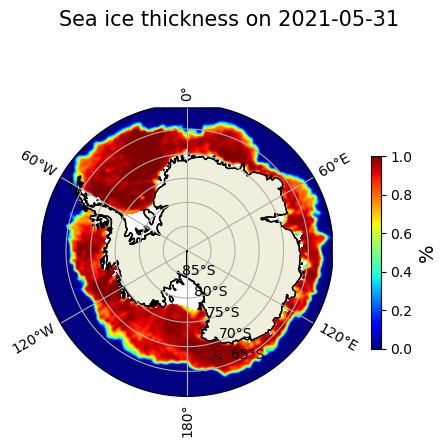

In [9]:
# Select the date to consider
date = '2021-05-31'
ice_thick = mod.sel(time=date, method='nearest')['sea_ice_fraction']

# Create a figure and define its size and projection
fig = plt.figure(figsize=(5, 5))
ax = plt.axes(projection=ccrs.SouthPolarStereo(central_longitude=0.0, globe=None))

# Define the characteristics of the plot
ax.coastlines()                                 # add the coastlines
gl = ax.gridlines(draw_labels=True)             # add the longitude / latitude lines
ax.add_feature(cfeature.LAND, zorder=1, edgecolor='k')   # add land mask
ax.set_extent([-180, 180, -60, -90], crs=ccrs.PlateCarree())   # define the extent of the map [lon_min,lon_max,lat_min,lat_max]

# Display the sea ice thickness
im = ax.pcolormesh(ice_thick['lon'].values, ice_thick['lat'].values, ice_thick,
                   cmap='jet', shading='auto', transform=ccrs.PlateCarree())

# Circular boundary
r_extent = 2850000
r_extent *= 1.2
circle_path = mpath.Path.unit_circle()
circle_path = mpath.Path(circle_path.vertices.copy() * r_extent, circle_path.codes.copy())
ax.set_boundary(circle_path)

# Set the color range to fit the data
vmin = ice_thick.min().item()
vmax = ice_thick.max().item()
im.set_clim(vmin, vmax)

# Add the colorbar
cbar = fig.colorbar(im, ax=ax, shrink=0.5, pad=0.1)
cbar.set_label('%', fontsize=14)   # add the title of the colorbar

# Add the title
fig.suptitle('Sea ice thickness on {}'.format(date), fontsize=15)

plt.show()

### Plotting time series
#### Although I selected one latitude and longitude, I noticed that the data contained two longitudes with the same value (e.g. 120E). Even after changing it to 125E, it still showed two values. 

In [49]:
# Define the longitude and latitude to plot
lon, lat = 120, -65.03

# Calculate the distance of the point to each point of the grid
distance = ((mod.lon-lon)**2+(mod.lat-lat)**2)**0.5

# Find the minimum distance
distance_min = distance.min()

# Select the dataset for the minimum distance
mod_point = mod.where(distance==distance_min,drop=True).squeeze()

mod_point

<xarray.Dataset>
Dimensions:           (time: 31, lon: 2)
Coordinates:
  * time              (time) datetime64[ns] 2021-05-31T12:00:00 ... 2021-06-3...
    lat               float32 -65.03
  * lon               (lon) float32 120.0 120.0
Data variables:
    sea_ice_fraction  (time, lon) float32 0.98 0.98 0.98 0.98 ... 0.97 0.99 0.99
Attributes: (12/52)
    Conventions:                CF-1.4, ACDD-1.3
    title:                      Global SST & Sea Ice Analysis, L4 OSTIA, 0.05...
    summary:                    A merged, multi-sensor L4 Foundation SST product
    references:                 Donlon, C.J., Martin, M., Stark, J.D., Robert...
    institution:                UKMO
    history:                    Created from sst.nc; obs_anal.nc; seaice.nc
    ...                         ...
    cdm_data_type:              grid
    History:                    Translated to CF-1.0 Conventions by Netcdf-Ja...
    geospatial_lat_min:         -89.9749984741211
    geospatial_lat_max:         -60.025001525878906
    geospatial_lon_min:         -179.97500610351562
    geospatial_lon_max:         179.97500610351562

#### I believe that because there are two longitudes with the same value in “mod_point,” the plot is displaying two lines instead of one. Is there any way to display only one line for a specific pair of coordinates?

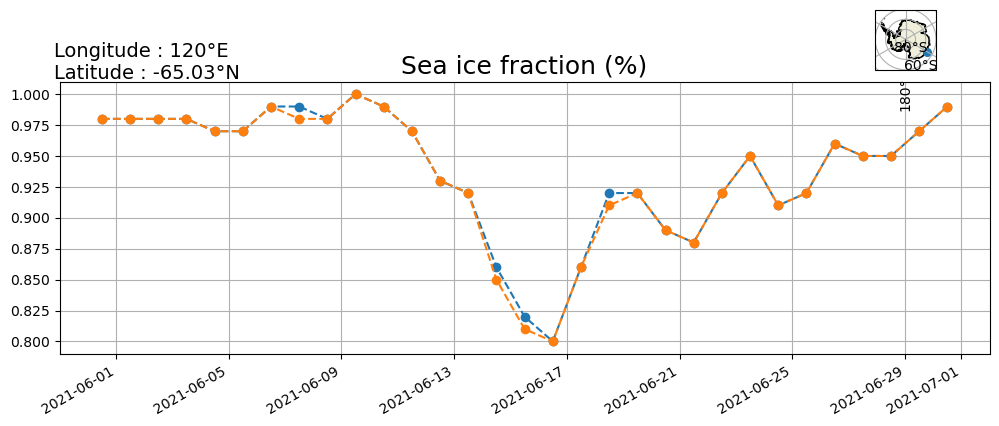

In [50]:
# Define the caracteristics of the plot
f = plt.figure(figsize=(12,4))                                       # create a figure and define its size
ax = f.add_subplot(111)                                              # create the axes of the plot
ax.grid()                                                            # add the grid lines
ax.set_title("Sea ice fraction (%)",fontsize=18)             # add the figure title
f.suptitle('Longitude : ' +str(lon) +'°E\nLatitude : ' + str(lat)+'°N',
           fontsize=14,horizontalalignment='left',x=0.12)            # Display the coordinates on the plot
f.autofmt_xdate()                                                    # format the dates in the x axis 
im = ax.plot(mod_point['time'],mod_point['sea_ice_fraction'],'o--')                              # plot the time serie

# Display the location of the point on a mini map
ax_mini_map = f.add_axes([0.73, 0.91, 0.2, 0.15], projection=ccrs.SouthPolarStereo())  # create the minimap and define its projection
gl = ax_mini_map.gridlines(draw_labels=True)                                     # add the coastlines
gl.right_labels = False                                                          # remove latitude labels on the right
gl.top_labels = False                                                            # remove longitude labels on the top
ax_mini_map.add_feature(cfeature.LAND, zorder=0, edgecolor='k')                  # add land mask 
ax_mini_map.set_extent([-180, 180, -60 , -90],crs=ccrs.PlateCarree())          # define the extent of the map [lon_min,lon_max,lat_min,lat_max]
ax_mini_map.scatter(lon, lat, 30,transform=ccrs.PlateCarree())           # plot the location of the point


#### One of my main objectives is to visualize the sea ice conditions in specific locations surrounding Antarctica. To do this, I set a latitude and longitude range of -80 to -70 and -135 to -180, respectively. I’m not sure if this produced the desired output, but I would like to have the previously defined polygon plotted on a minimap. Is this possible? I’ve tried a few codes, but they didn’t work for me.

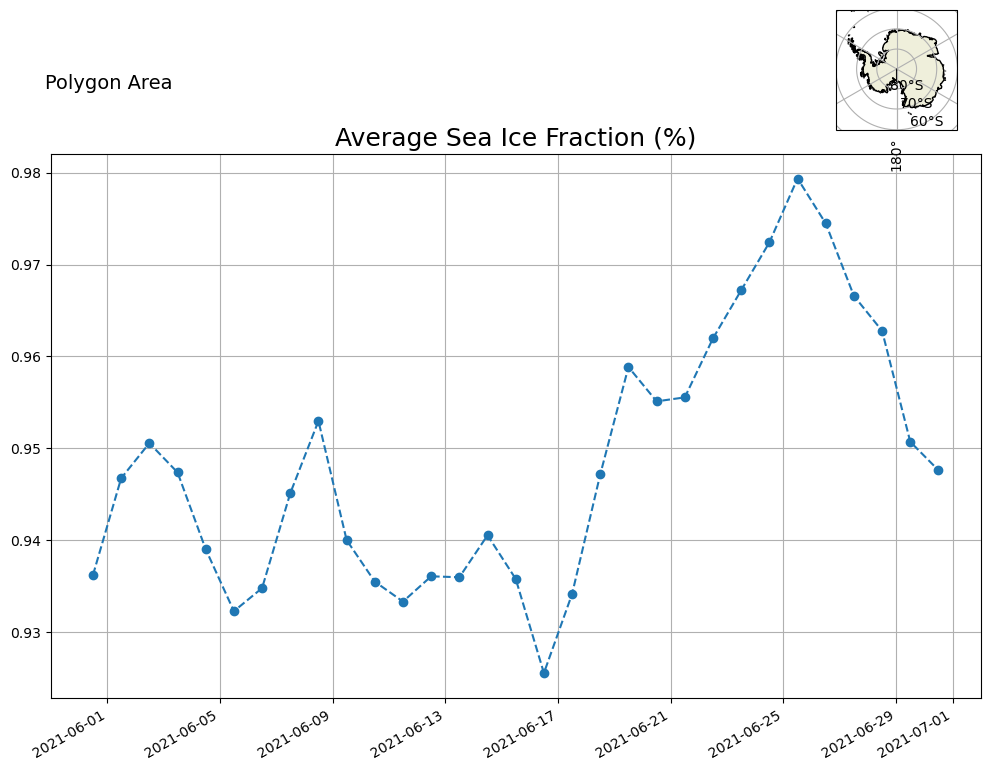

In [12]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import numpy as np
from shapely.geometry import Polygon

# Define the polygon coordinates
lon = [-135, -180]
lat = [-80, -70]

# Calculate the average sea ice fraction within the polygon
polygon_mask = (mod.lon >= np.min(lon)) & (mod.lon <= np.max(lon)) & (mod.lat >= np.min(lat)) & (mod.lat <= np.max(lat))
mod_polygon = mod.where(polygon_mask, drop=True).mean(dim=['lon', 'lat'])

# Define the characteristics of the plot
f = plt.figure(figsize=(12, 8))
ax = f.add_subplot(111)
ax.grid()
ax.set_title("Average Sea Ice Fraction (%)", fontsize=18)
f.suptitle('Polygon Area', fontsize=14, horizontalalignment='left', x=0.12)
f.autofmt_xdate()
im = ax.plot(mod_polygon['time'], mod_polygon['sea_ice_fraction'], 'o--')

# Display the polygon area on a mini map
ax_mini_map = f.add_axes([0.73, 0.91, 0.2, 0.15], projection=ccrs.SouthPolarStereo())
gl = ax_mini_map.gridlines(draw_labels=True)
gl.right_labels = False
gl.top_labels = False
ax_mini_map.add_feature(cfeature.LAND, zorder=0, edgecolor='k')
ax_mini_map.set_extent([-180, 180, -90, -60], crs=ccrs.PlateCarree())

# Convert polygon coordinates to the projection of the mini map
polygon_points = np.column_stack([lon, lat])
polygon_transformed = ccrs.PlateCarree().transform_points(ccrs.SouthPolarStereo(), polygon_points[:, 0], polygon_points[:, 1])

# Add the first coordinate at the end to close the polygon
polygon_transformed = np.vstack([polygon_transformed, polygon_transformed[0]])

# Create a Shapely polygon from the transformed coordinates
polygon = Polygon(polygon_transformed[:, :2])

# Plot the transformed polygon on the mini map
ax_mini_map.add_geometries(
    [polygon],
    ccrs.PlateCarree(),
    edgecolor='red',
    facecolor='none',
    linewidth=2
)

# Save the plot as an image file
plt.savefig('plot_image.png', dpi=300)

# Display the plot
plt.show()


#### In this section of the script, I wanted to plot time seires for two points in the different locations. But I am getting four lines, could you please check what might be causing this error?

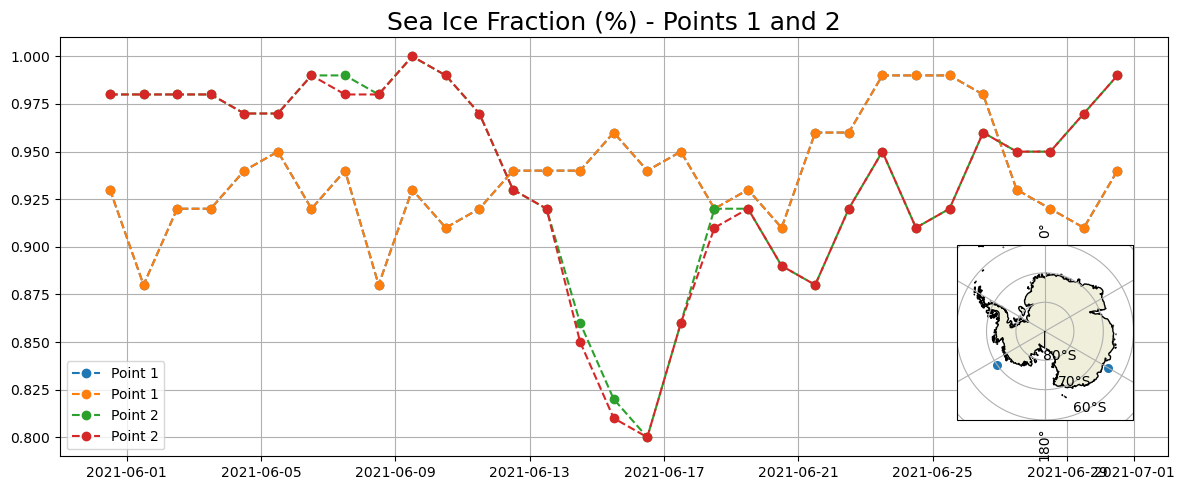

In [73]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt

# Define the latitude and longitude coordinates for the two points
lon1, lat1 = -125, -69.97
lon2, lat2 = 120, -65.03

# Calculate the distance of each point to the grid points
distance1 = ((mod.lon - lon1) ** 2 + (mod.lat - lat1) ** 2) ** 0.5
distance2 = ((mod.lon - lon2) ** 2 + (mod.lat - lat2) ** 2) ** 0.5

# Find the minimum distance for each point
distance_min1 = distance1.min()
distance_min2 = distance2.min()

# Select the datasets for the minimum distances
mod_point1 = mod.where(distance1 == distance_min1, drop=True).squeeze()
mod_point2 = mod.where(distance2 == distance_min2, drop=True).squeeze()

# Define the characteristics of the plot
f = plt.figure(figsize=(12, 5))

# Plot for Point 1
ax1 = f.add_subplot(111)
ax1.grid()
ax1.set_title("Sea Ice Fraction (%) - Points 1 and 2", fontsize=18)
im1 = ax1.plot(mod_point1['time'], mod_point1['sea_ice_fraction'], 'o--', label='Point 1')
im2 = ax1.plot(mod_point2['time'], mod_point2['sea_ice_fraction'], 'o--', label='Point 2')
ax1.legend()

# Display the location of Points 1 and 2 on the mini map
ax_mini_map = f.add_axes([0.7, 0.15, 0.35, 0.35], projection=ccrs.SouthPolarStereo())
ax_mini_map.gridlines(draw_labels=True)
ax_mini_map.add_feature(cfeature.LAND, zorder=0, edgecolor='k')
ax_mini_map.set_extent([-180, 180, -90, -60], crs=ccrs.PlateCarree())
ax_mini_map.scatter([lon1, lon2], [lat1, lat2], 30, transform=ccrs.PlateCarree())

# Adjust the layout
plt.tight_layout()

# export the figure as png in 500 dpi
plt.savefig('sea_ice.png', dpi=500)

# Display the plot
plt.show()
